# EDA With Red Wine Data
 * This data set contains records related to red and white variants of the Portuguese Vinho Verde wine.
 * It contains information from 1599 red wine samples and 4898 white wine samples. Input variables in the data set consist of the type of wine (either red or white wine) and metrics from objective tests (e.g. acidity levels, PH values, ABV, etc.).
  * These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

 * Variable Name -
 1. fixed_acidity
 2. volatile_acidity
 3. citric_acid
 4. residual_sugar
 5. chlorides
 6. free_sulfur_dioxide
 7. total_sulfur_dioxide
 8. density
 9. pH
 10. sulphates
 11.
 12.

In [1]:
import pandas as pd


In [3]:
red_wine = pd.read_csv('/content/wine-quality-white-and-red.csv')

In [4]:
red_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
# Summary of the dataset
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
# Descriptive  summary of dataset.
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [12]:
red_wine.shape

(6497, 13)

In [13]:
## List down all the columns name
red_wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [14]:
red_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [15]:
## Missing value in the datasets
red_wine.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [20]:
## Duplicate records
red_wine[red_wine.duplicated()]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
20,white,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6462,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6465,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6479,red,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [21]:
## Remove duplicates
red_wine.drop_duplicates(inplace=True)

In [25]:
# Check the duplicates
red_wine.shape

(5320, 13)

In [31]:
## Check the Correlation
red_wine = red_wine.drop('type', axis=1)
red_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: >

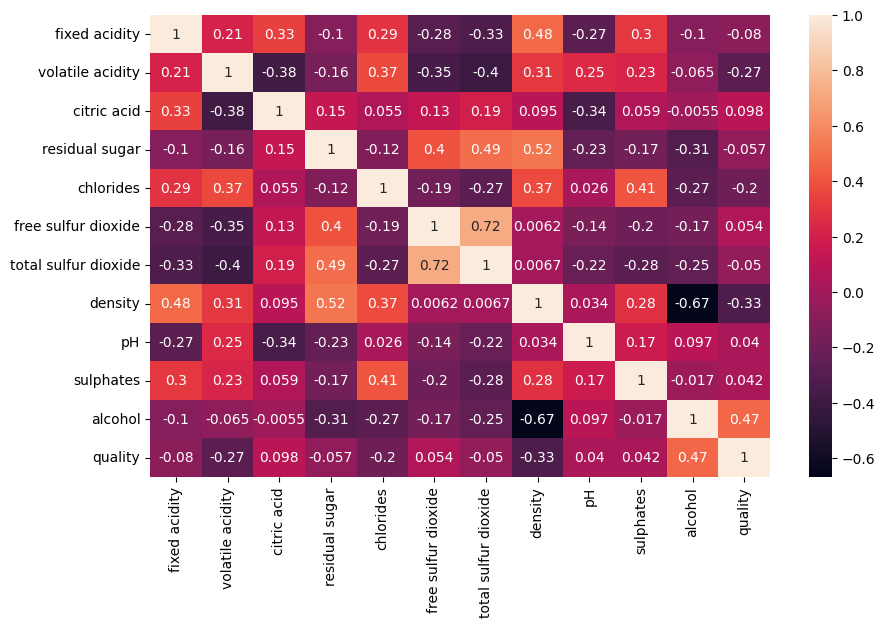

In [38]:
## Visualization. Compute pairwise correlation of columns, excluding NA/null values.
plt.figure(figsize=(10,6))
sns.heatmap(red_wine.corr(), annot=True)

In [41]:
'''Return a Series containing counts of unique values.
The resulting object will be in descending order so that the
first element is the most frequently-occurring element.
Excludes NA values by default.'''
## Conclusion - It is an imbalanced dataset
red_wine.quality.value_counts()

,count
quality,
6,2323
5,1752
7,856
4,206
8,148
3,30
9,5


Text(0, 0.5, 'Count')

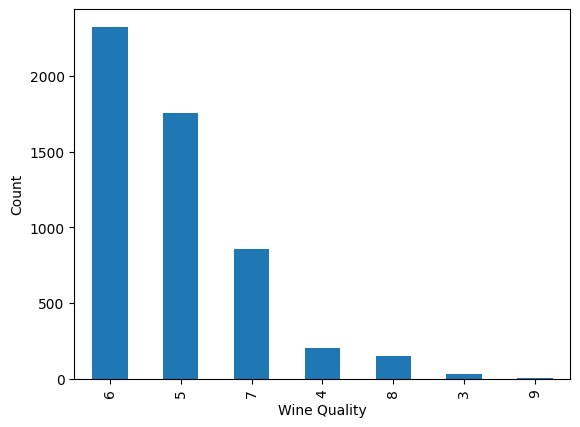

In [43]:
red_wine.quality.value_counts().plot(kind='bar')
plt.xlabel('Wine Quality')
plt.ylabel('Count')

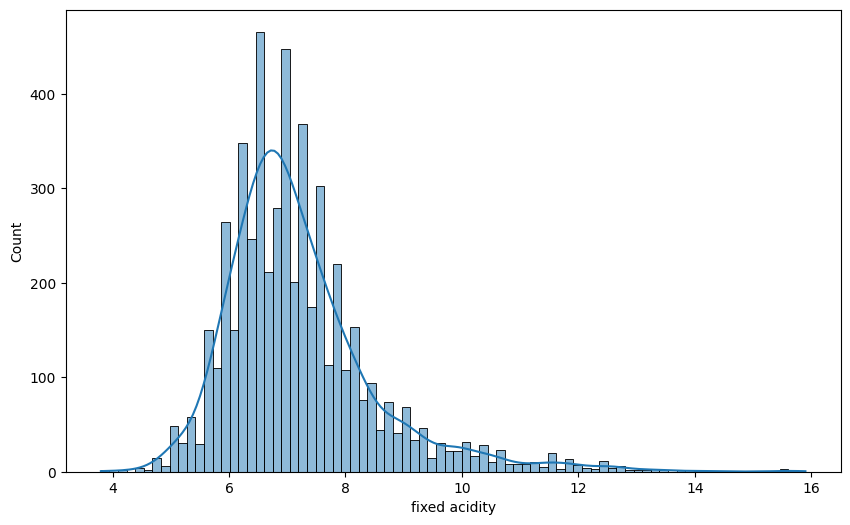

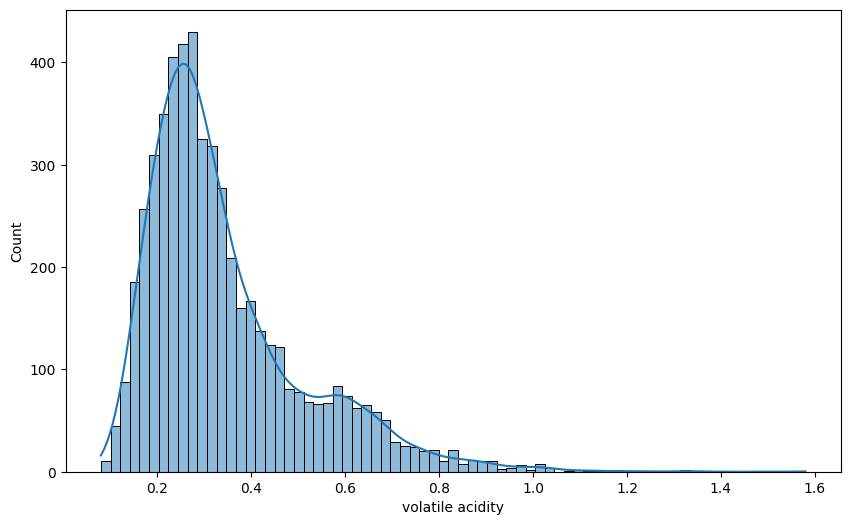

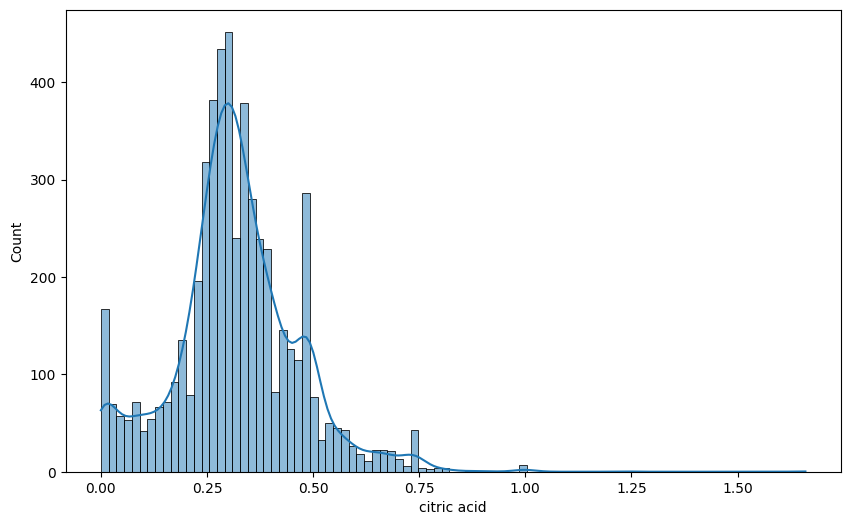

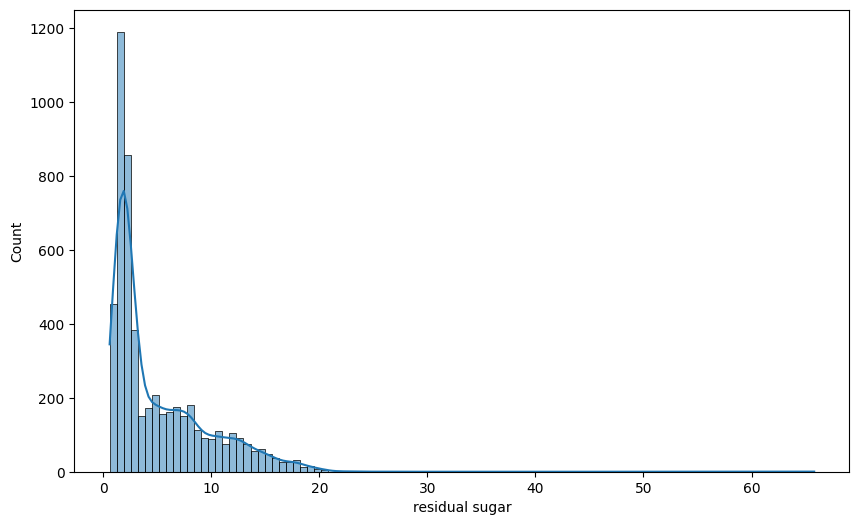

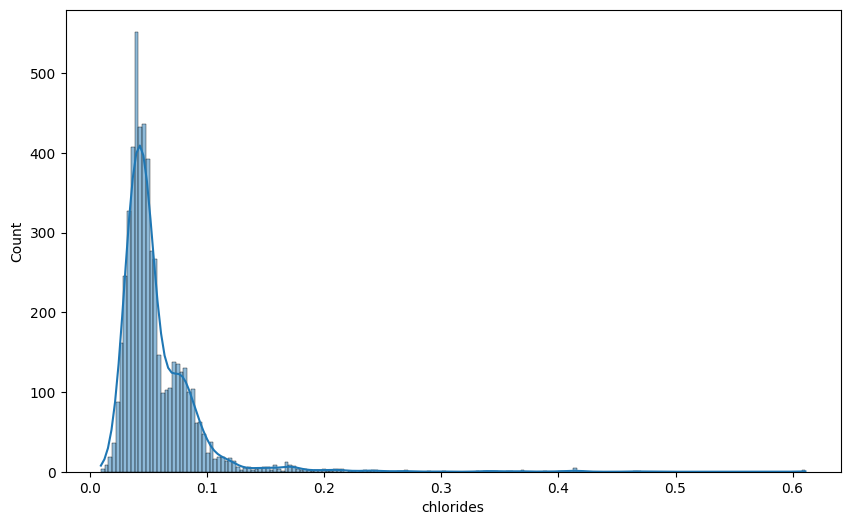

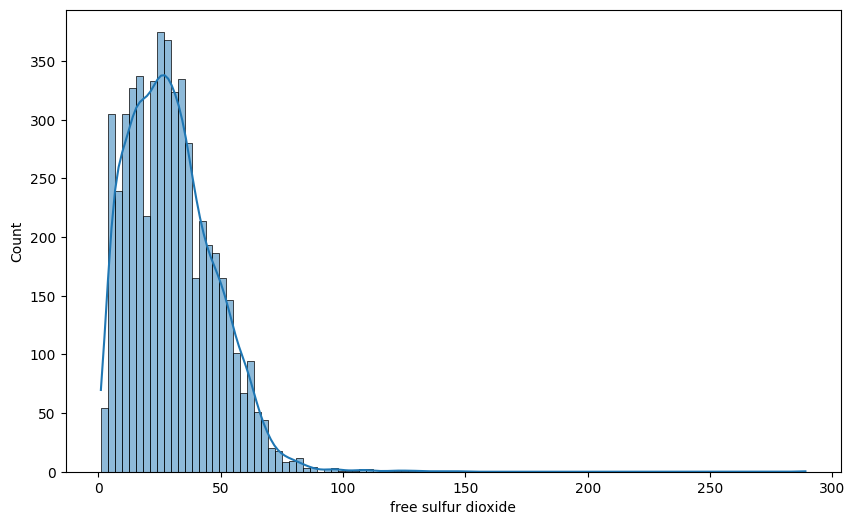

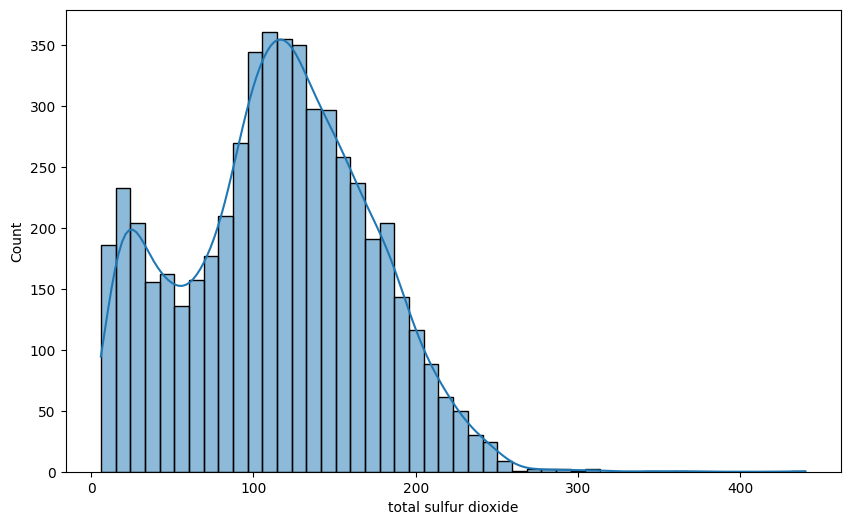

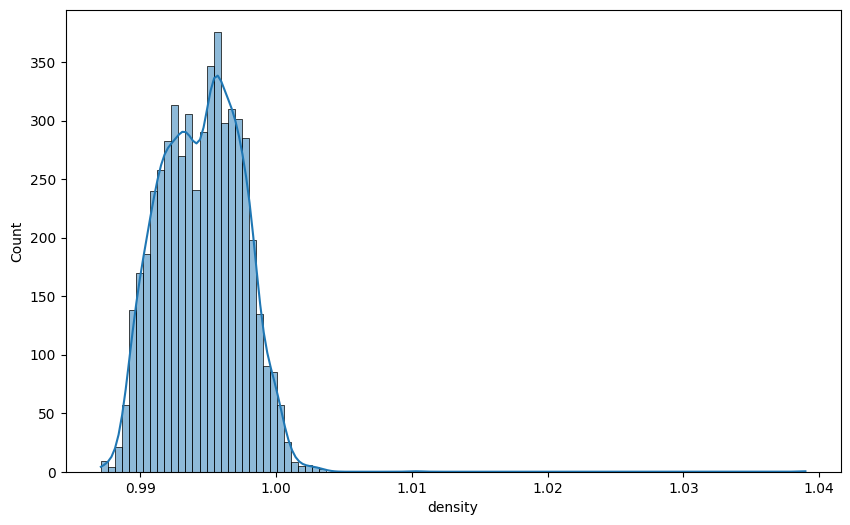

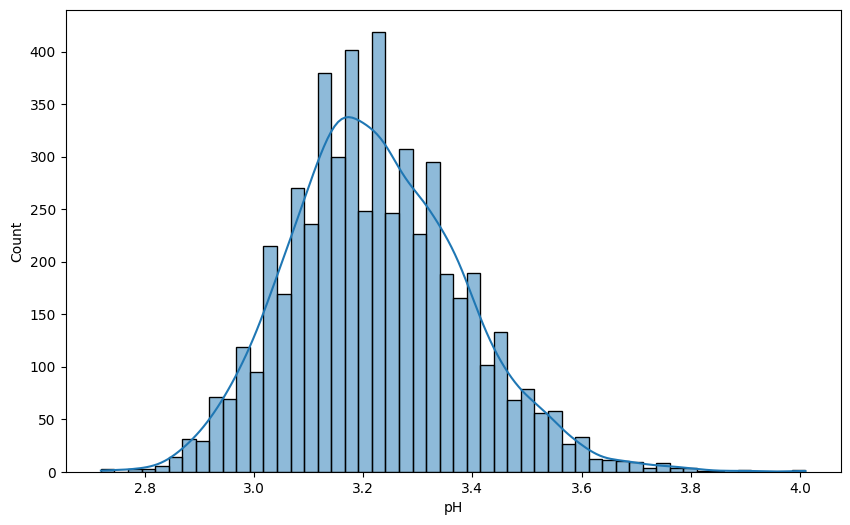

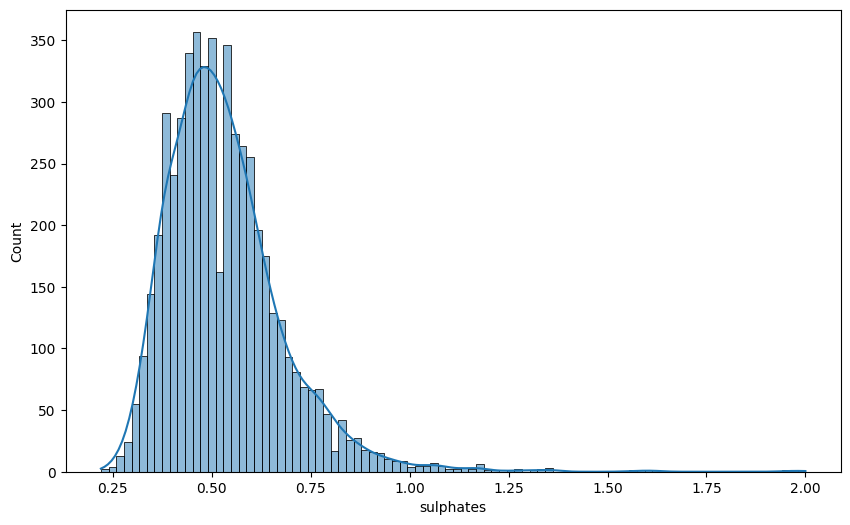

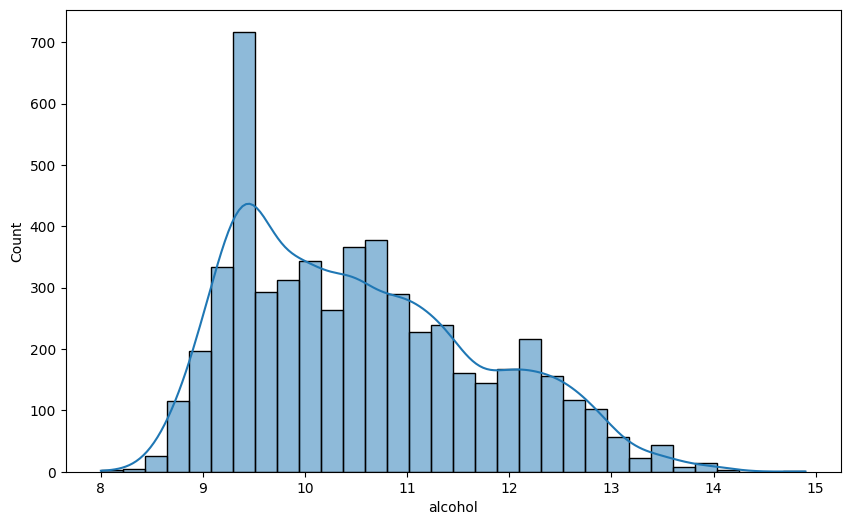

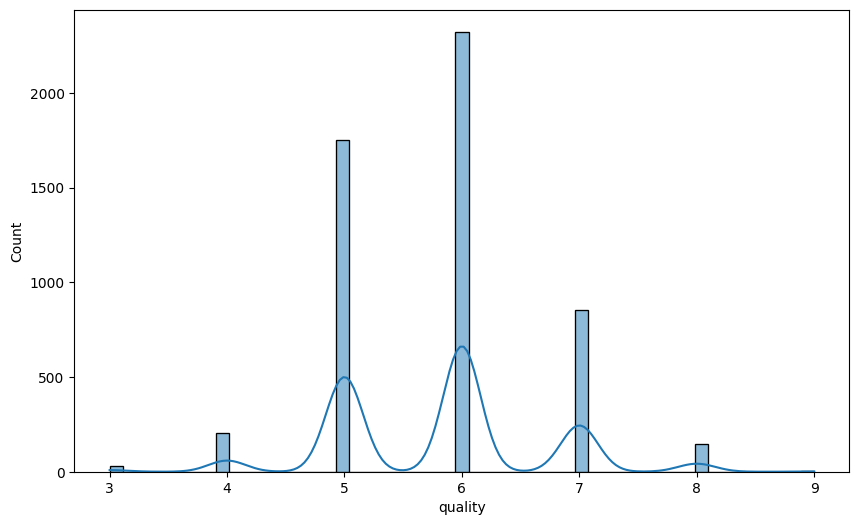

In [46]:
## Check the distribution each and every coulmns
for col in red_wine.columns:
  plt.figure(figsize=(10,6))
  sns.histplot(red_wine[col], kde=True)

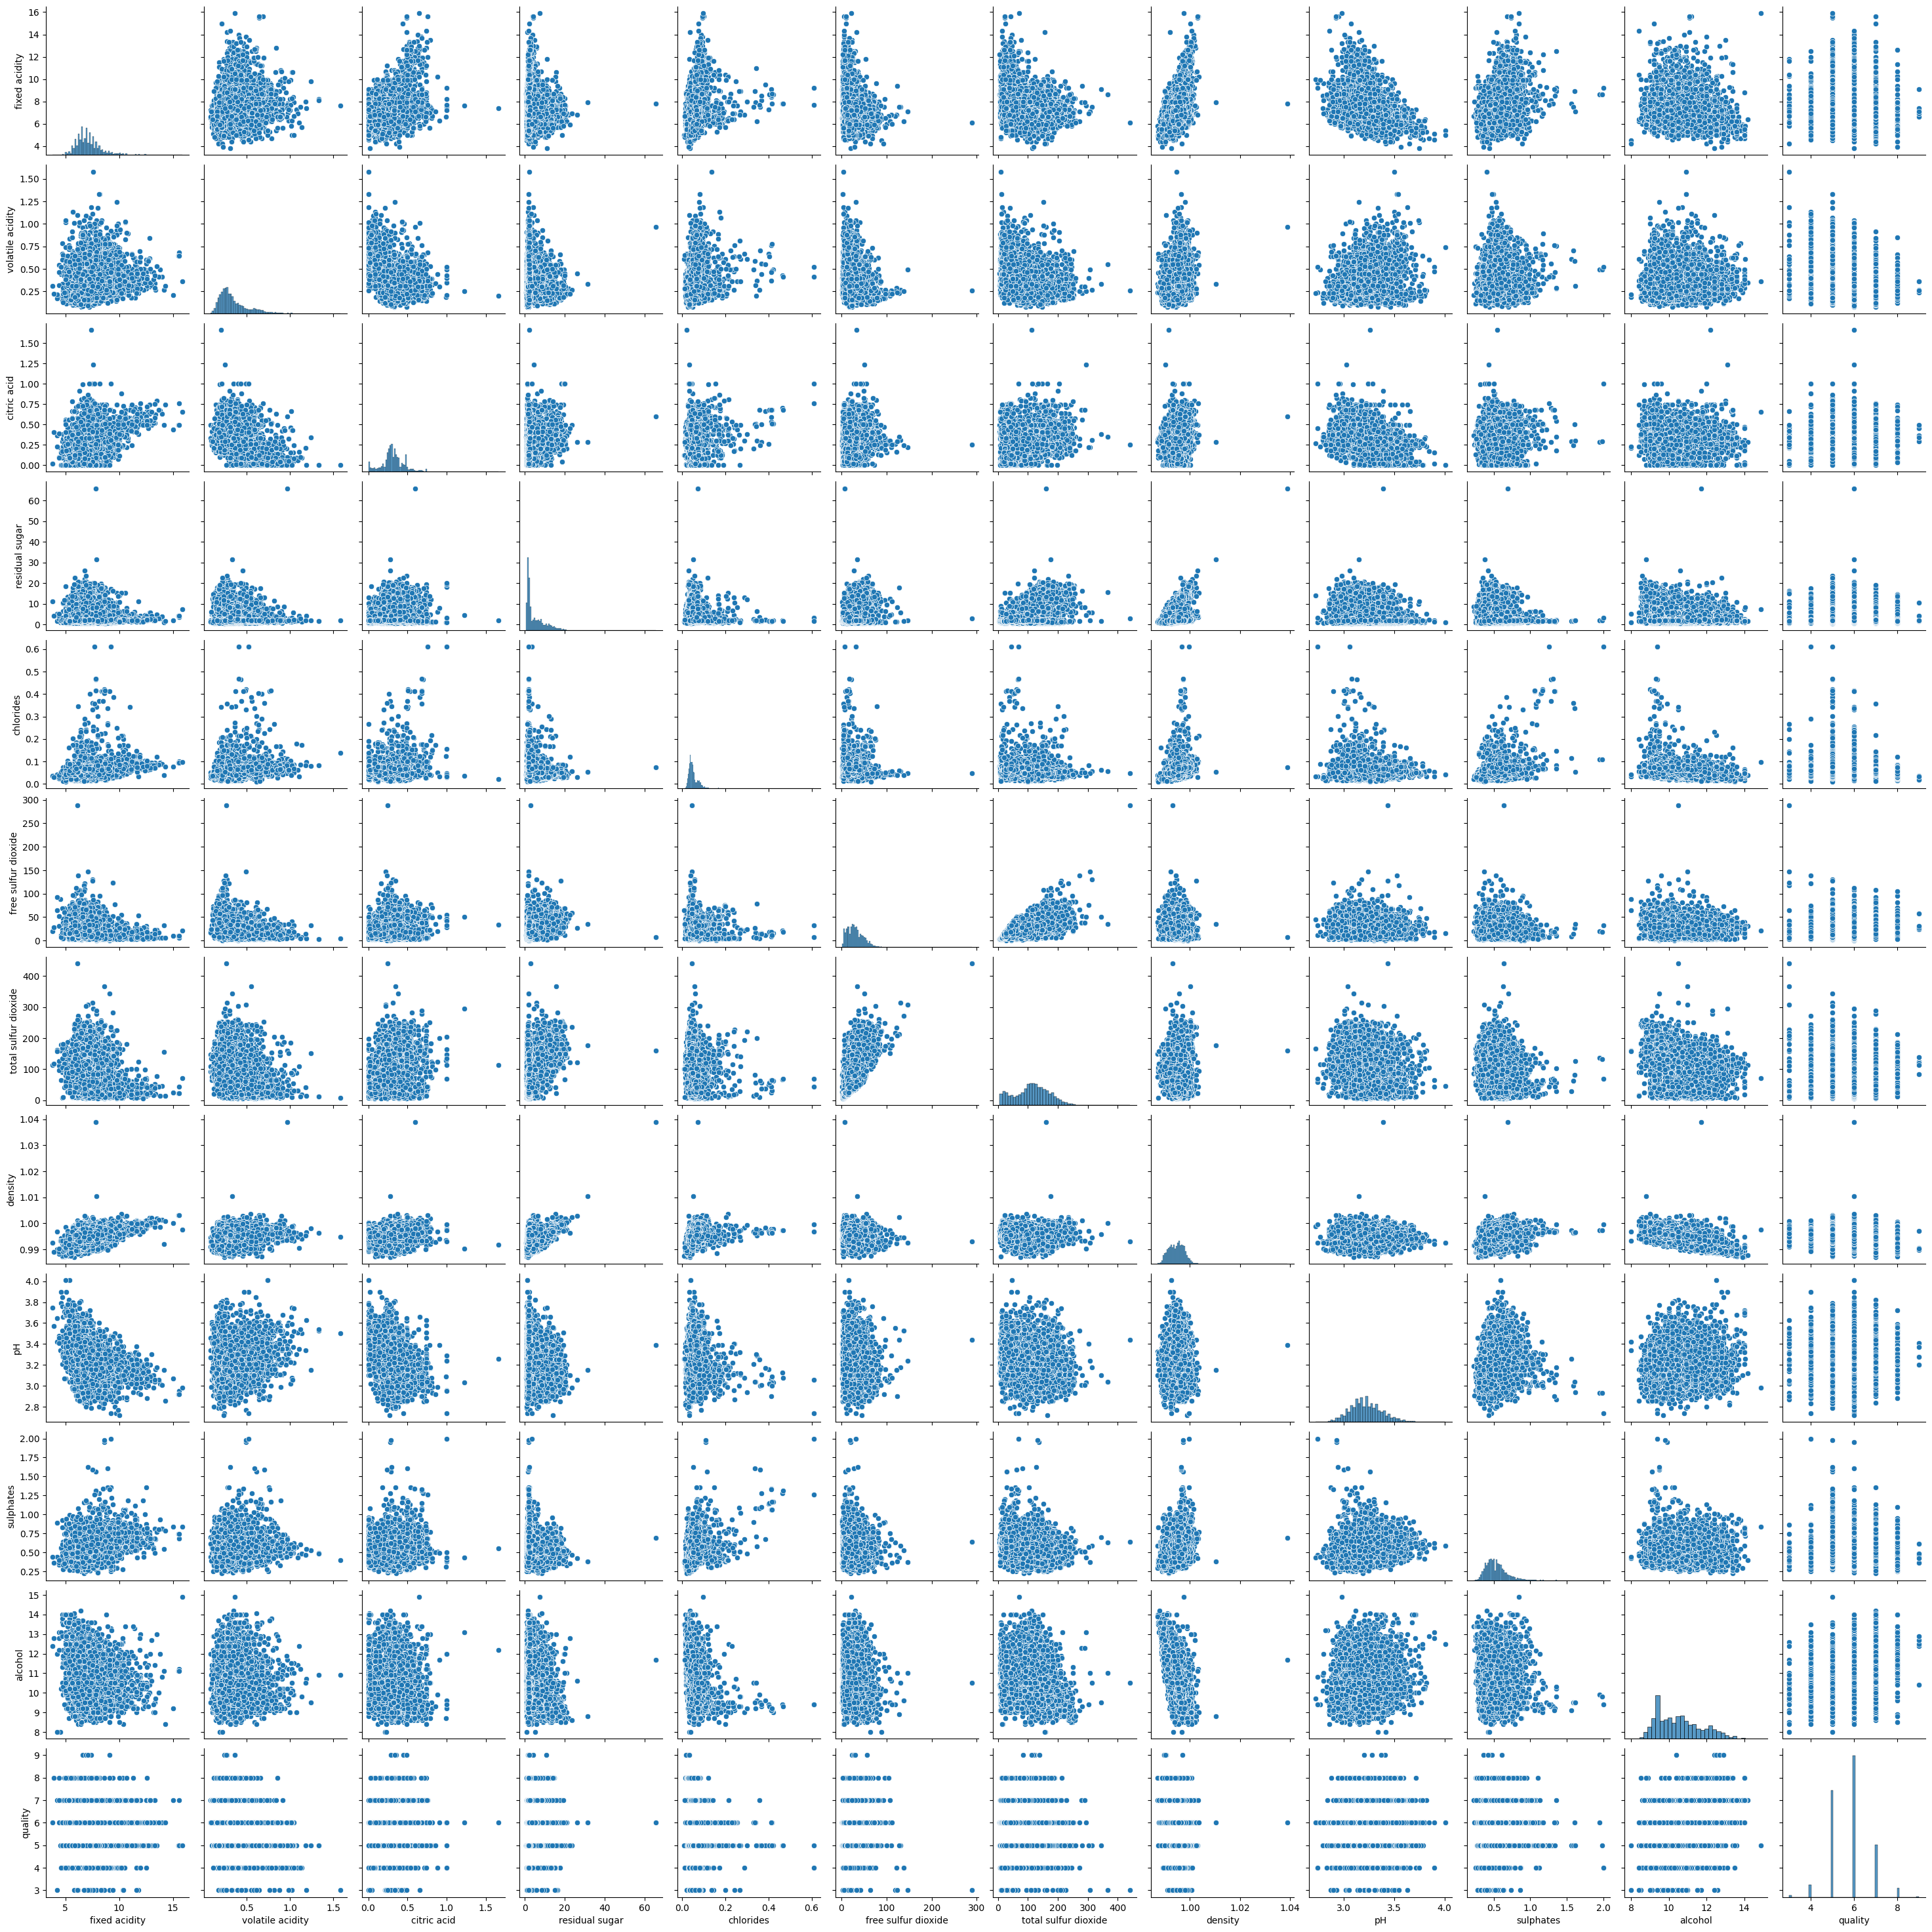

In [47]:
## Univariate, Baivariate, Multivariat analysis
sns.pairplot(red_wine)

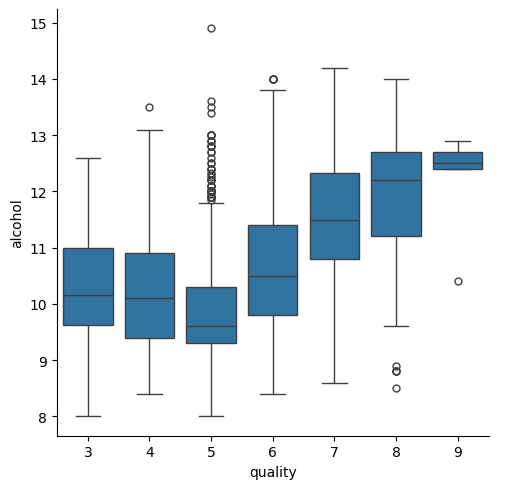

In [48]:
## Categorical plot
sns.catplot(x='quality', y='alcohol', data=red_wine, kind='box')


<Axes: xlabel='alcohol', ylabel='pH'>

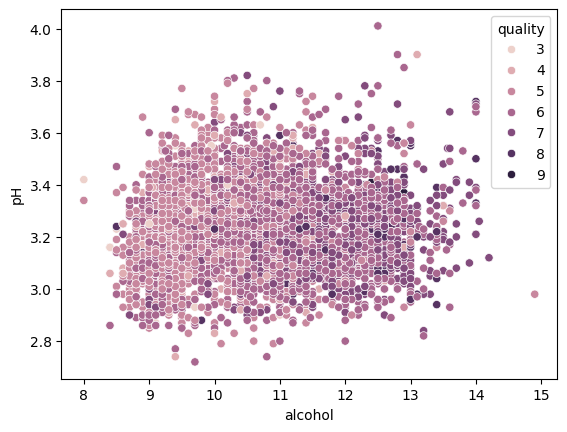

In [49]:
## Scatterplot
sns.scatterplot(x='alcohol',y='pH', hue='quality', data=red_wine)

In [50]:
## CONCLUSION:

# Project Conclusion based on the analysis performed so far:
# - The dataset contains both red and white wine data with various physiochemical properties and a quality rating.
# - There are no missing values in the dataset.
# - There are duplicate records, which were removed.
# - The 'type' column was removed for correlation analysis as it was non-numeric.
# - The 'quality' variable is imbalanced, with the majority of wines having a quality rating of 5 or 6.
# - The heatmap shows the correlations between the numerical features.
# - The distribution plots show the spread of values for each feature.
# - The categorical plot of 'quality' vs 'alcohol' suggests a potential relationship between alcohol content and wine quality.
# - The scatterplot of 'alcohol' vs 'pH' with 'quality' as hue shows some clustering based on quality.
